# Test visualization

In [2]:
import os
import importlib
import numpy as np
import nibabel as nib
import tensorflow as tf

from utils import plot_utils
from datasets import get_dataset
from utils.med_utils import load_medical_seg, load_medical_image

path      = '/storage/Totalsegmentator_dataset/s0001'
img_path  = os.path.join(path, 'ct.nii.gz')
mask_path = os.path.join(path, 'masks.npz')

organs    = get_dataset('total_segmentator').loc[0, 'label']

Loading dataset total_segmentator...


In [3]:
sparse_mask, _ = load_medical_seg(mask_path)

mask = tf.sparse.to_dense(sparse_mask).numpy()

print(mask.shape)

2023-04-19 10:07:37.520016: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-19 10:07:38.262043: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1616] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 14783 MB memory:  -> device: 0, name: Quadro RTX 5000, pci bus id: 0000:17:00.0, compute capability: 7.5
2023-04-19 10:07:38.262896: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1616] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 14485 MB memory:  -> device: 1, name: Quadro RTX 5000, pci bus id: 0000:65:00.0, compute capability: 7.5


(249, 188, 213, 104)


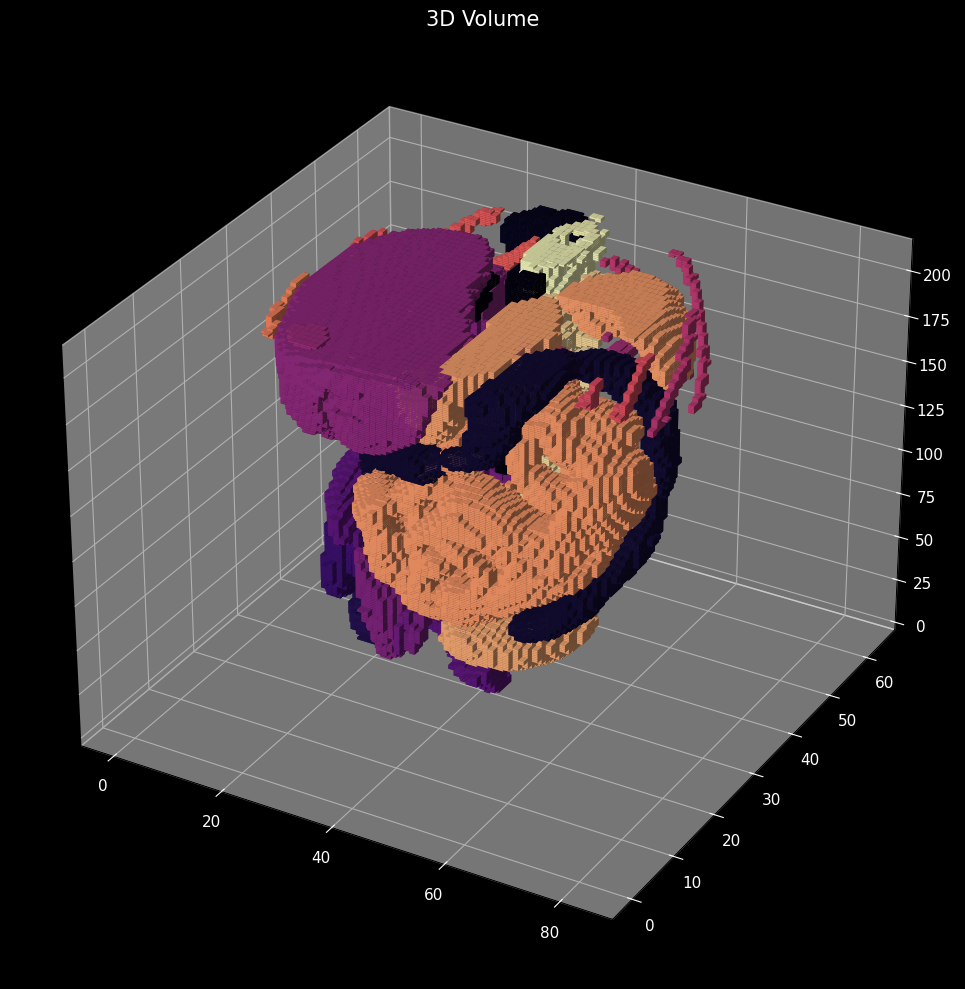

In [13]:
importlib.reload(plot_utils)

import matplotlib.pyplot as plt

from loggers import set_level

set_level('info', 'utils.plot_utils')

show_organs = [i for i, o in enumerate(organs) if 'rib' in o or 'vertebr' in o or 'right' not in o]

sx, sy, sz = -3, -3, 1

plot_utils.plot_volume(
    mask,
    labels_to_show = show_organs,
    strides = (sx, sy, sz)
)

In [8]:
organs

['adrenal_gland_left',
 'adrenal_gland_right',
 'aorta',
 'autochthon_left',
 'autochthon_right',
 'brain',
 'clavicula_left',
 'clavicula_right',
 'colon',
 'duodenum',
 'esophagus',
 'face',
 'femur_left',
 'femur_right',
 'gallbladder',
 'gluteus_maximus_left',
 'gluteus_maximus_right',
 'gluteus_medius_left',
 'gluteus_medius_right',
 'gluteus_minimus_left',
 'gluteus_minimus_right',
 'heart_atrium_left',
 'heart_atrium_right',
 'heart_myocardium',
 'heart_ventricle_left',
 'heart_ventricle_right',
 'hip_left',
 'hip_right',
 'humerus_left',
 'humerus_right',
 'iliac_artery_left',
 'iliac_artery_right',
 'iliac_vena_left',
 'iliac_vena_right',
 'iliopsoas_left',
 'iliopsoas_right',
 'inferior_vena_cava',
 'kidney_left',
 'kidney_right',
 'liver',
 'lung_lower_lobe_left',
 'lung_lower_lobe_right',
 'lung_middle_lobe_right',
 'lung_upper_lobe_left',
 'lung_upper_lobe_right',
 'pancreas',
 'portal_vein_and_splenic_vein',
 'pulmonary_artery',
 'rib_left_1',
 'rib_left_10',
 'rib_left_1